In [2]:
# 라이브러리
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('C:/Users/User/Desktop/데브코스/2차 프로젝트/shopping_trends_updated_new.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


new 집단과 new 이외 집단 두개 집단간 비교  
loyal 집단 여부 변수 생성

In [3]:
# 함수 생성
def binary_new(type):
    if type == 'New Customer':
        return 'New'
    else:
        return 'Others'

def binary_loyal(type):
    if type == 'Loyal Customer':
        return 'Loyal'
    else:
        return 'Others'

# 변수 생성
df['binary_new']  = df['Customer Type'].apply(binary_new)
df['binary_loyal']  = df['Customer Type'].apply(binary_loyal)
df['binary_loyal'].value_counts()

Others    3395
Loyal      505
Name: binary_loyal, dtype: int64

## 1. 집단별 성별 분류

신규고객 여부에 따른 성비는 같은가? :  8.377630045733993 0.0037986744348121196 1
충성고객 여부에 따른 성비는 같은가? :  1.2880138020299456 0.2564143045114363 1


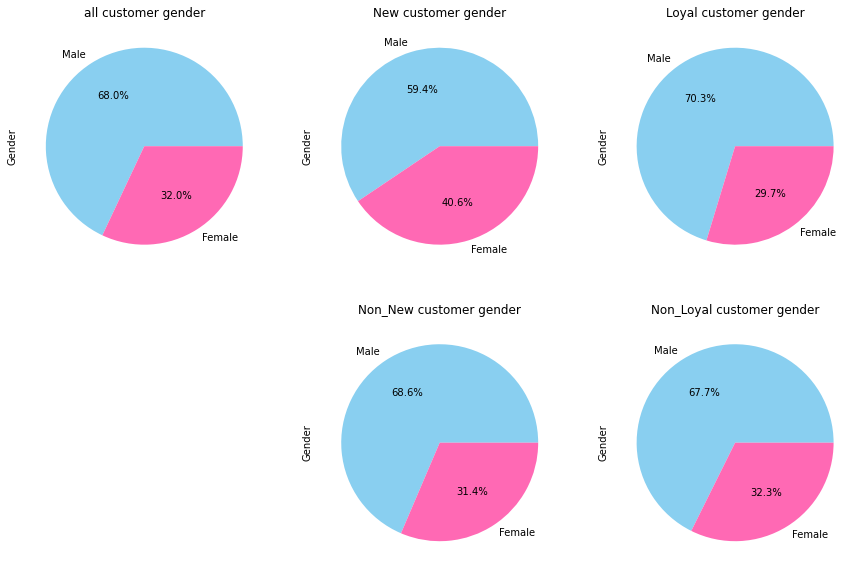

In [4]:
# gender 조건
male = df['Gender']=='Male'
female = df['Gender']=='Female'

# customer type 조건
New = df['Customer Type'] == 'New Customer'
Loyal = df['Customer Type'] == 'Loyal Customer'

Non_New = df['binary_new'] == 'Others'
Non_Loyal = df['binary_loyal'] == 'Others'

# 시각화 color 지정
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

# 전체 분포
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
df['Gender'].value_counts().plot(kind = 'pie', colors = colors[:2], autopct = '%.1f%%')
plt.title('all customer gender')

plt.subplot(2,3,2)
df[New]['Gender'].value_counts().plot(kind = 'pie', colors = colors[:2], autopct = '%.1f%%')
plt.title('New customer gender')

plt.subplot(2,3,3)
df[Loyal]['Gender'].value_counts().plot(kind = 'pie', colors = colors[:2], autopct = '%.1f%%')
plt.title('Loyal customer gender')

plt.subplot(2,3,5)
df[Non_New]['Gender'].value_counts().plot(kind = 'pie', colors = colors[:2], autopct = '%.1f%%')
plt.title('Non_New customer gender')

plt.subplot(2,3,6)
df[Non_Loyal]['Gender'].value_counts().plot(kind = 'pie', colors = colors[:2], autopct = '%.1f%%')
plt.title('Non_Loyal customer gender')


# 검정1. 신규고객 여부에 따라 성비가 다른가?(귀무가설 : 신규고객 여부에 따라 비율 차이가 없다.)
type_gender1 = pd.crosstab(df['Gender'],df['binary_new'])
chi2, p, dof, ef = chi2_contingency(type_gender1)
print('신규고객 여부에 따른 성비는 같은가? : ', chi2, p, dof)

# 검정2. 충성고객 여부에 따라 성비가 다른가?
type_gender2 = pd.crosstab(df['Gender'],df['binary_loyal'])
chi2, p, dof, ef = chi2_contingency(type_gender2)
print('충성고객 여부에 따른 성비는 같은가? : ', chi2, p, dof)

In [5]:
type_gender2

binary_loyal,Loyal,Others
Gender,,
Female,150,1098
Male,355,2297


독립성 검정  
검정1 해석 : 유의수준 0.05하에 귀무가설 '신규고객 여부에 따른 남녀 성비는 같다'를 기각한다.  
             신규고객 여부에 따라 남녀 성비가 유의미하게 차이난다.  
검정2 해석 : 유의수준 0.05하에 귀무가설 '충성고객 여부에 따른 남녀 성비는 같다'를 기각할 근거가 없다.  
             충성고객 여부와 남녀 성비는 관련이 없다.

## 2. 집단별 item 분퓨

신규고객 여부에 따른 상품구매비율은 같은가? :  2.087462016298542 0.9114814409234842 6
충성고객 여부에 따른 상품구매비율은 같은가? :  2.0065968773463982 0.9190908895374609 6


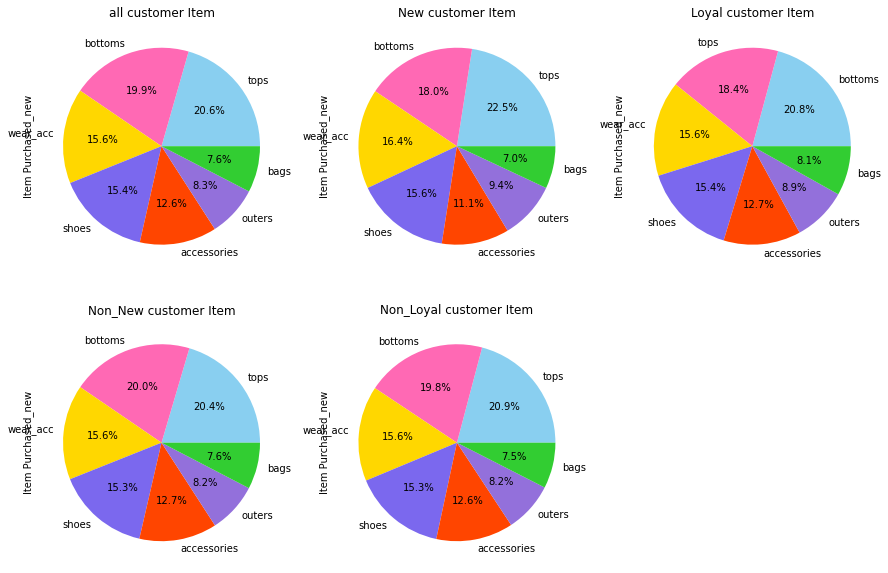

In [14]:
# gender 조건
male = df['Gender']=='Male'
female = df['Gender']=='Female'

# customer type 조건
New = df['Customer Type'] == 'New Customer'
Loyal = df['Customer Type'] == 'Loyal Customer'

Non_New = df['binary_new'] == 'Others'
Non_Loyal = df['binary_loyal'] == 'Others'

# 시각화 color 지정
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

# 전체 분포
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
df['Item Purchased_new'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('all customer Item')

plt.subplot(2,3,2)
df[New]['Item Purchased_new'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('New customer Item')

plt.subplot(2,3,3)
df[Loyal]['Item Purchased_new'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Loyal customer Item')

plt.subplot(2,3,4)
df[Non_New]['Item Purchased_new'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Non_New customer Item')

plt.subplot(2,3,5)
df[Non_Loyal]['Item Purchased_new'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Non_Loyal customer Item')


# 검정3. 신규고객 여부에 따라 성비가 다른가?(귀무가설 : 신규고객 여부에 따라 비율 차이가 없다.)
type_item1 = pd.crosstab(df['Item Purchased_new'],df['binary_new'])
chi2, p, dof, ef = chi2_contingency(type_item1)
print('신규고객 여부에 따른 상품구매비율은 같은가? : ', chi2, p, dof)

# 검정4. 충성고객 여부에 따라 성비가 다른가?
type_item2 = pd.crosstab(df['Item Purchased_new'],df['binary_loyal'])
chi2, p, dof, ef = chi2_contingency(type_item2)
print('충성고객 여부에 따른 상품구매비율은 같은가? : ', chi2, p, dof)

독립성 검정결과  
신규고객, 충성고객 여부에 따라 item 구매 비율은 다르지 않다. 

## 3. Season

신규고객 여부에 따른 계절 구매비는 같은가? :  1.4953307385541712 0.6833484120305233 3
충성고객 여부에 따른 계절 구매비는 같은가? :  6.617820179392249 0.08512999636604424 3


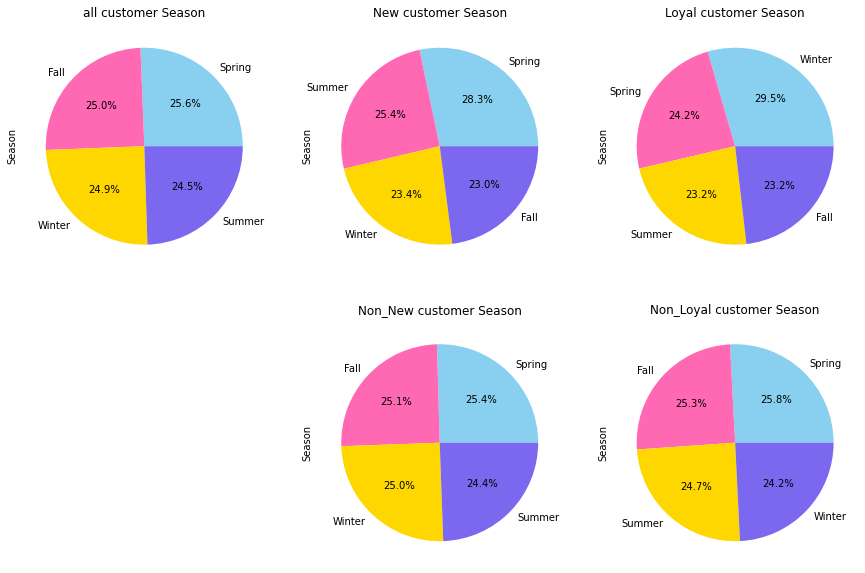

In [99]:
# gender 조건
male = df['Gender']=='Male'
female = df['Gender']=='Female'

# customer type 조건
New = df['Customer Type'] == 'New Customer'
Loyal = df['Customer Type'] == 'Loyal Customer'

Non_New = df['binary_new'] == 'Others'
Non_Loyal = df['binary_loyal'] == 'Others'

# 시각화 color 지정
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

# 전체 분포
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
df['Season'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('all customer Season')

plt.subplot(2,3,2)
df[New]['Season'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('New customer Season')

plt.subplot(2,3,3)
df[Loyal]['Season'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Loyal customer Season')

plt.subplot(2,3,5)
df[Non_New]['Season'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Non_New customer Season')

plt.subplot(2,3,6)
df[Non_Loyal]['Season'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Non_Loyal customer Season')


# 검정5. 신규고객 여부에 따라 성비가 다른가?(귀무가설 : 신규고객 여부에 따라 비율 차이가 없다.)
type_Season1 = pd.crosstab(df['Season'],df['binary_new'])
chi2, p, dof, ef = chi2_contingency(type_Season1)
print('신규고객 여부에 따른 계절 구매비는 같은가? : ', chi2, p, dof)

# 검정6. 충성고객 여부에 따라 성비가 다른가?
type_Season2 = pd.crosstab(df['Season'],df['binary_loyal'])
chi2, p, dof, ef = chi2_contingency(type_Season2)
print('충성고객 여부에 따른 계절 구매비는 같은가? : ', chi2, p, dof)

검정결과 신규/충성고객 여부에 따른 계절별 구매 비율은 다르지 않다.

## 4. sub

신규고객 여부에 따른 구독자비율 같은가? :  1.5576504561323379 0.21200957051823505 1
충성고객 여부에 따른 구독자비율은 같은가? :  0.3060985582892624 0.5800841923634517 1


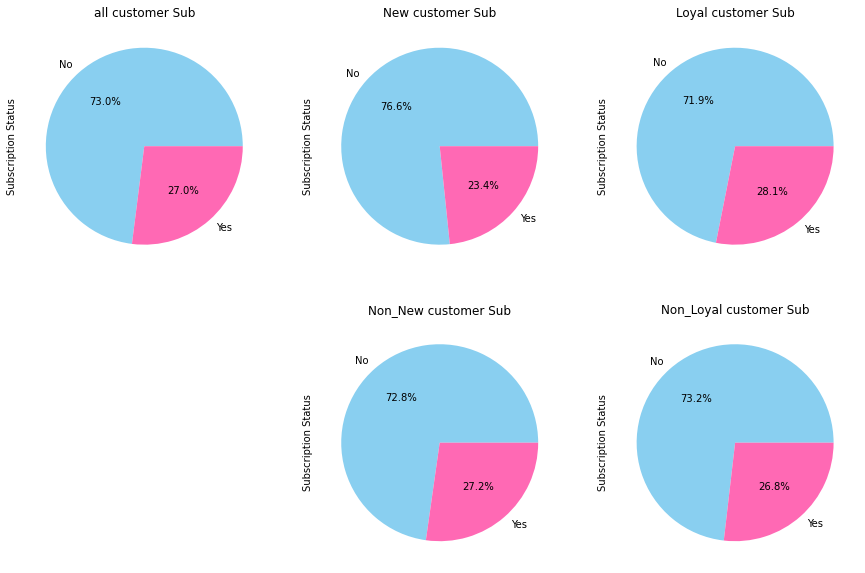

In [215]:
# gender 조건
male = df['Gender']=='Male'
female = df['Gender']=='Female'

# customer type 조건
New = df['Customer Type'] == 'New Customer'
Loyal = df['Customer Type'] == 'Loyal Customer'

Non_New = df['binary_new'] == 'Others'
Non_Loyal = df['binary_loyal'] == 'Others'

# 시각화 color 지정
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

# 전체 분포
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
df['Subscription Status'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('all customer Sub')

plt.subplot(2,3,2)
df[New]['Subscription Status'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('New customer Sub')

plt.subplot(2,3,3)
df[Loyal]['Subscription Status'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Loyal customer Sub')

plt.subplot(2,3,5)
df[Non_New]['Subscription Status'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Non_New customer Sub')

plt.subplot(2,3,6)
df[Non_Loyal]['Subscription Status'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Non_Loyal customer Sub')


# 검정7. 신규고객 여부에 따라 성비가 다른가?(귀무가설 : 신규고객 여부에 따라 비율 차이가 없다.)
type_Sub1 = pd.crosstab(df['Subscription Status'],df['binary_new'])
chi2, p, dof, ef = chi2_contingency(type_Sub1)
print('신규고객 여부에 따른 구독자비율 같은가? : ', chi2, p, dof)

# 검정8. 충성고객 여부에 따라 성비가 다른가?
type_Sub2 = pd.crosstab(df['Subscription Status'],df['binary_loyal'])
chi2, p, dof, ef = chi2_contingency(type_Sub2)
print('충성고객 여부에 따른 구독자비율은 같은가? : ', chi2, p, dof)

신규/충성고객 여부에 따른 구독자 비율은 같다.(유의미한 차이가 없다)

## 5. discount

신규고객 여부에 따른 할인여부는 같은가? :  0.9820488534416509 0.32169350020546994 1
충성고객 여부에 따른 할인여부는 같은가? :  0.9941933150634026 0.31871964684288967 1


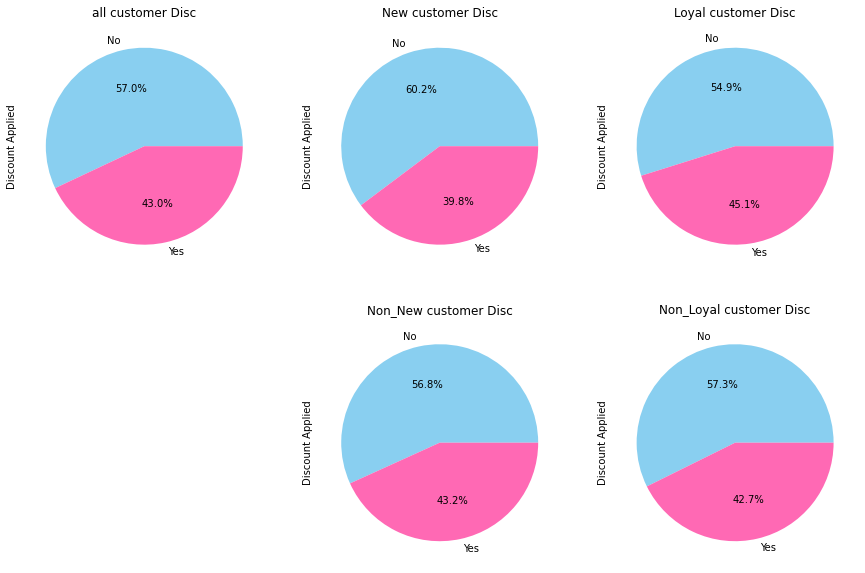

In [216]:
# gender 조건
male = df['Gender']=='Male'
female = df['Gender']=='Female'

# customer type 조건
New = df['Customer Type'] == 'New Customer'
Loyal = df['Customer Type'] == 'Loyal Customer'

Non_New = df['binary_new'] == 'Others'
Non_Loyal = df['binary_loyal'] == 'Others'

# 시각화 color 지정
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

# 전체 분포
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
df['Discount Applied'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('all customer Disc')

plt.subplot(2,3,2)
df[New]['Discount Applied'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('New customer Disc')

plt.subplot(2,3,3)
df[Loyal]['Discount Applied'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Loyal customer Disc')

plt.subplot(2,3,5)
df[Non_New]['Discount Applied'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Non_New customer Disc')

plt.subplot(2,3,6)
df[Non_Loyal]['Discount Applied'].value_counts().plot(kind = 'pie', colors = colors[:7], autopct = '%.1f%%')
plt.title('Non_Loyal customer Disc')


# 검정9. 신규고객 여부에 따라 성비가 다른가?(귀무가설 : 신규고객 여부에 따라 비율 차이가 없다.)
type_Disc1 = pd.crosstab(df['Discount Applied'],df['binary_new'])
chi2, p, dof, ef = chi2_contingency(type_Disc1)
print('신규고객 여부에 따른 할인여부는 같은가? : ', chi2, p, dof)

# 검정10. 충성고객 여부에 따라 성비가 다른가?
type_Disc2 = pd.crosstab(df['Discount Applied'],df['binary_loyal'])
chi2, p, dof, ef = chi2_contingency(type_Disc2)
print('충성고객 여부에 따른 할인여부는 같은가? : ', chi2, p, dof)

신규/충성고객 여부에 따라 할인을 적용한 구매건수의 유의미한 차이가 없다.

# 1. 성별 item 구매

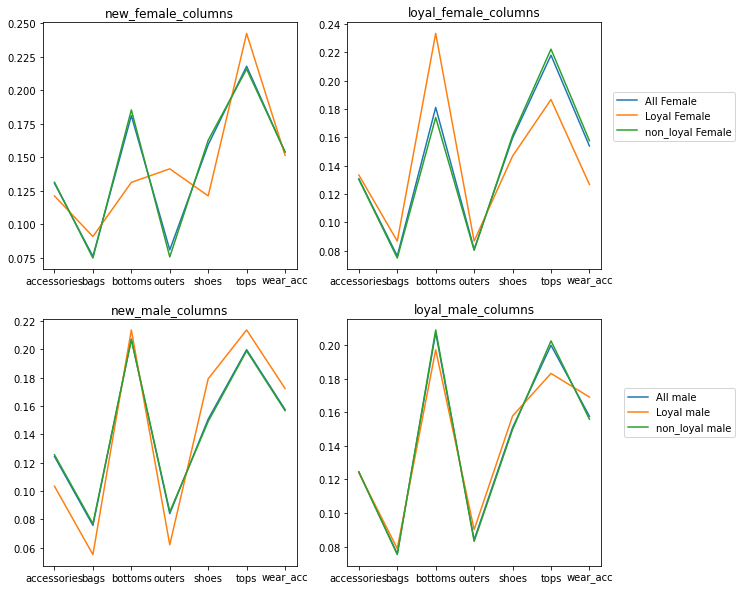

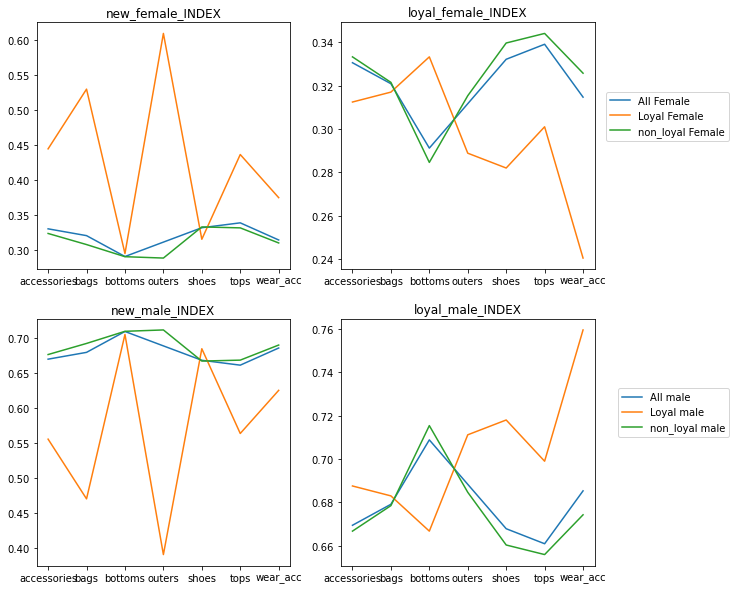

In [17]:
# customer type 조건
New = df['Customer Type'] == 'New Customer'
Loyal = df['Customer Type'] == 'Loyal Customer'

item_gender = pd.crosstab(df['Item Purchased_new'], df['Gender'], normalize = 'columns');
item_gender_new = pd.crosstab(df[New]['Item Purchased_new'], df['Gender'], normalize = 'columns');
item_gender_Loyal = pd.crosstab(df[Loyal]['Item Purchased_new'], df['Gender'], normalize = 'columns');
item_gender_non_new = pd.crosstab(df[Non_New]['Item Purchased_new'], df['Gender'], normalize = 'columns');
item_gender_non_Loyal = pd.crosstab(df[Non_Loyal]['Item Purchased_new'], df['Gender'], normalize = 'columns');
# 여성 중 전체 집단과 구매건수 차이 파악.
index = item_gender.index
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_gender.Female,label = 'All Female')
plt.plot(index, item_gender_new.Female, label = 'New Female')
plt.plot(index, item_gender_non_new.Female, label = 'non_new Female')

plt.title('new_female_columns')


plt.subplot(2,2,2)
plt.plot(index, item_gender.Female,label = 'All Female')
plt.plot(index, item_gender_Loyal.Female, label = 'Loyal Female')
plt.plot(index, item_gender_non_Loyal.Female, label = 'non_loyal Female')
plt.legend(loc='lower right', bbox_to_anchor=(1.55,0.5))
plt.title('loyal_female_columns')

# 남성 중 전체집단과 구매건수 차이
index = item_gender.index
plt.subplot(2,2,3)
plt.plot(index, item_gender.Male,label = 'All male')
plt.plot(index, item_gender_new.Male, label = 'New male')
plt.plot(index, item_gender_non_new.Male, label = 'non_new male')

plt.title('new_male_columns')

plt.subplot(2,2,4)
plt.plot(index, item_gender.Male,label = 'All male')
plt.plot(index, item_gender_Loyal.Male, label = 'Loyal male')
plt.plot(index, item_gender_non_Loyal.Male, label = 'non_loyal male')
plt.legend(loc='lower right', bbox_to_anchor=(1.55,0.5))
plt.title('loyal_male_columns')
plt.show()

# item 별 
item_gender1 = pd.crosstab(df['Item Purchased_new'], df['Gender'], normalize = 'index');item_gender1
item_gender_new1 = pd.crosstab(df[New]['Item Purchased_new'], df['Gender'], normalize = 'index');item_gender_new1
item_gender_Loyal1 = pd.crosstab(df[Loyal]['Item Purchased_new'], df['Gender'], normalize = 'index');item_gender_Loyal1
item_gender_non_new1 = pd.crosstab(df[Non_New]['Item Purchased_new'], df['Gender'], normalize = 'index');
item_gender_non_Loyal1 = pd.crosstab(df[Non_Loyal]['Item Purchased_new'], df['Gender'], normalize = 'index');
# 여성 중 전체 집단과 구매건수 차이 파악.
index = item_gender.index
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_gender1.Female,label = 'All Female')
plt.plot(index, item_gender_new1.Female, label = 'New Female')
plt.plot(index, item_gender_non_new1.Female, label = 'non_new Female')

plt.title('new_female_INDEX')


plt.subplot(2,2,2)
plt.plot(index, item_gender1.Female,label = 'All Female')
plt.plot(index, item_gender_Loyal1.Female, label = 'Loyal Female')
plt.plot(index, item_gender_non_Loyal1.Female, label = 'non_loyal Female')
plt.legend(loc='lower right', bbox_to_anchor=(1.55,0.5))
plt.title('loyal_female_INDEX')

# 남성 중 전체집단과 구매건수 차이
index = item_gender.index
plt.subplot(2,2,3)
plt.plot(index, item_gender1.Male,label = 'All male')
plt.plot(index, item_gender_new1.Male, label = 'New male')
plt.plot(index, item_gender_non_new1.Male, label = 'non_new male')

plt.title('new_male_INDEX')

plt.subplot(2,2,4)
plt.plot(index, item_gender1.Male,label = 'All male')
plt.plot(index, item_gender_Loyal1.Male, label = 'Loyal male')
plt.plot(index, item_gender_non_Loyal1.Male, label = 'non_loyal male')
plt.legend(loc='lower right', bbox_to_anchor=(1.55,0.5))
plt.title('loyal_male_INDEX')
plt.show()

In [28]:
# 검정11. 여성회원에 한해 신규집단 여부에 따라 상품구매 수가 같다.
female_new_item2 = pd.crosstab(df[female]['Item Purchased_new'],df['binary_new'])
chi2, p, dof, ef = chi2_contingency(female_new_item2)
print('여성회원 중 신규집단 여부에 따라 상품구매 비가 다른가? : ', chi2, p, dof)
female_new_item2

bottoms = female_new_item1.iloc[2]
outers = female_new_item1.iloc[3]
shoes = female_new_item1.iloc[6]
other = female_new_item1.iloc[[0,1,4,5]].sum()
tmp1 = pd.DataFrame({'bottoms' : bottoms, 'outers' : outers,'shoes' : shoes ,'other':other})
chi2, p, dof, ef = chi2_contingency(tmp1)
print('여성고객 중 신규집단여부에 따른 bags, outers, shoes, other일 때 상품구매 차이 검정 : ', chi2, p, dof)
female_new_item2

여성회원 중 신규집단 여부에 따라 상품구매 비가 다른가? :  7.999319464211033 0.23815316758596242 6
여성고객 중 신규집단여부에 따른 bags, outers, shoes, other일 때 상품구매 차이 검정 :  6.348829012806044 0.09581880855100737 3


binary_new,New,Others
Item Purchased_new,,
accessories,12,151
bags,9,86
bottoms,13,213
outers,14,87
shoes,12,187
tops,24,248
wear_acc,15,177


In [19]:
male_new_item1 = pd.crosstab(df[male]['Item Purchased_new'],df['binary_new'])
chi2, p, dof, ef = chi2_contingency(male_new_item1)
print('남성회원 중 신규집단 여부에 따라 상품구매 비가 다른가? : ', chi2, p, dof)


bottoms = male_new_item1.iloc[2]
tops = male_new_item1.iloc[5]
other = male_new_item1.iloc[[0,1,3,4,6]].sum()
tmp1 = pd.DataFrame({'bottoms' : bottoms, 'tops' : tops, 'other':other})
chi2, p, dof, ef = chi2_contingency(tmp1)
print('bottoms, tops, other에 대해 남성 중 신규집단 여부에 따른 상품구매비 차이. : ', chi2, p, dof)

tmp1

남성회원 중 신규집단 여부에 따라 상품구매 비가 다른가? :  3.5052152039076723 0.7432757063313833 6
bottoms, tops, other에 대해 남성 중 신규집단 여부에 따른 상품구매비 차이. :  0.28667010860733955 0.8664637078605558 2


,bottoms,tops,other
binary_new,,,
New,31,31,83
Others,519,499,1489


In [21]:
# 검정12 신규집단에서 상품별 남녀 구매비율에 유의미한 차이를 보이는가?
female_new_item1 = pd.crosstab(df[New]['Item Purchased_new'],df['Gender'])
chi2, p, dof, ef = chi2_contingency(female_new_item1)
print('신규집단 내에서 성별에 따라 상품구매비가 다른가? : ', chi2, p, dof)
female_new_item2

# 검정 13 충성집단에서 상품별 남녀 구매비율에 유의미한 차이를 보이는가?
female_new_item2 = pd.crosstab(df[Loyal]['Item Purchased_new'],df['Gender'])
chi2, p, dof, ef = chi2_contingency(female_new_item2)
print('충성고객 내에서 성별에 따라 상품구매비가 다른가? : ', chi2, p, dof)
female_new_item1

신규집단 내에서 성별에 따라 상품구매비가 다른가? :  9.040744230113248 0.17129957784238203 6
충성고객 내에서 성별에 따라 상품구매비가 다른가? :  2.12915454643084 0.907445123157751 6


Gender,Female,Male
Item Purchased_new,,
accessories,12,15
bags,9,8
bottoms,13,31
outers,14,9
shoes,12,26
tops,24,31
wear_acc,15,25


In [178]:
# 검정 14
bags = female_new_item1.iloc[1]
outers = female_new_item1.iloc[3]
other = female_new_item1.iloc[[0,2,4,5,6]].sum()
tmp1 = pd.DataFrame({'bags' : bags, 'outers' : outers, 'other':other})
chi2, p, dof, ef = chi2_contingency(tmp1)
print('bags, outers, other일 때 신규집단 내에서 성별과 item의 검정 : ', chi2, p, dof)
tmp1

bags, outers, other일 때 신규집단 내에서 성별과 item의 검정 :  5.939655246648806 0.0513121545882511 2


,bags,outers,other
Gender,,,
Female,9,14,76
Male,8,9,128


### 매출차이를 통한 정량적 기준을 제시해 유의성을 설명하고자 함  
anova 분산분석 진행  
조건  
1. 정규성 : 시각화로 진행  
2. 등분산검정 : 각 집단에서 분산은 동일하다.  
3. 각 집단에서 표본들은 독립적으로 추출되어야한다.

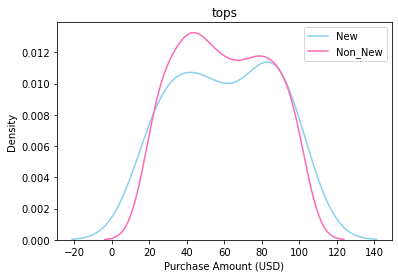

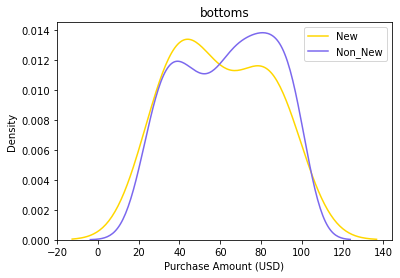

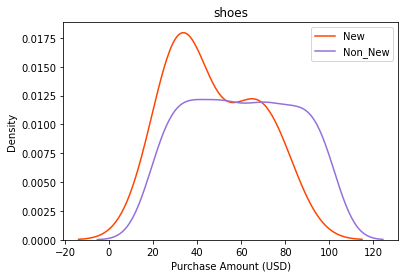

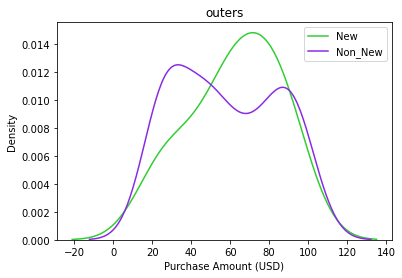

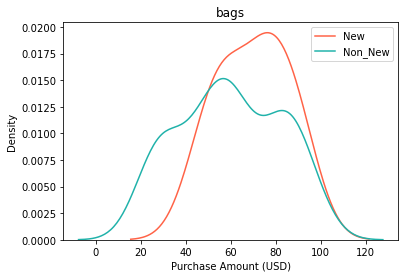

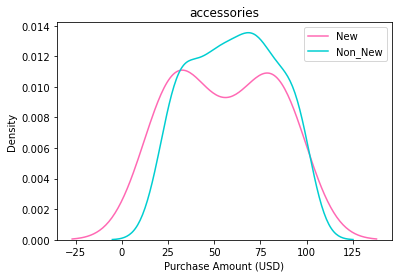

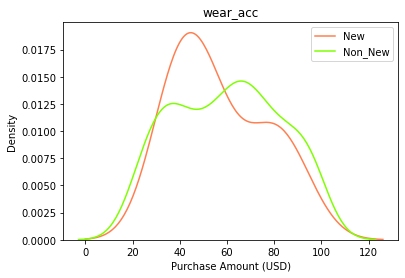

binary_new  Item Purchased_new
New         accessories             666
            bags                    629
            bottoms                 778
            outers                  871
            shoes                   568
            tops                   1448
            wear_acc                854
Others      accessories            9162
            bags                   5126
            bottoms               13432
            outers                 5030
            shoes                 11267
            tops                  14767
            wear_acc              10593
Name: Purchase Amount (USD), dtype: int64

In [206]:
# 신규집단 여성 columns 그래프에서 차이가 어느정도 보였기에 매출 분포 확인.
item_color_dict = {'tops' : '#89CFF0', 
                   'bottoms' : '#FF69B4', 
                   'shoes' : '#FFD700', 
                   'outers' : '#7B68EE', 
                   'bags' : '#FF4500', 
                   'accessories' : '#9370DB',
                   'wear_acc' : '#32CD32'
}
color_index=0
for item in df['Item Purchased_new'].unique():
    for group in [New,Non_New]:
        sns.kdeplot(
            df[female][group][df['Item Purchased_new']==item]['Purchase Amount (USD)'],
            color = colors[color_index])
        plt.title(item)
        plt.legend(['New','Non_New'])
        color_index +=1
    plt.show()
df[female].groupby(['binary_new','Item Purchased_new']).sum()['Purchase Amount (USD)']

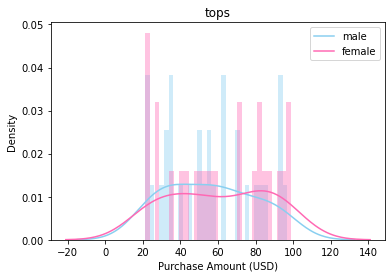

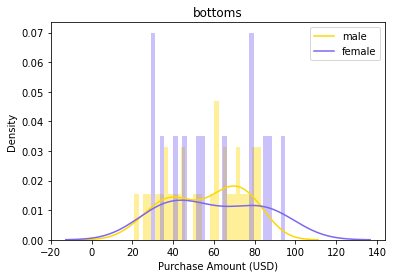

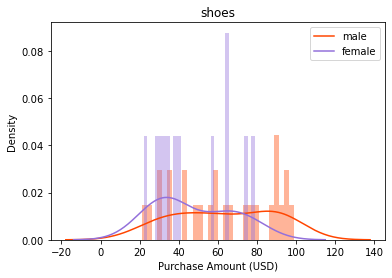

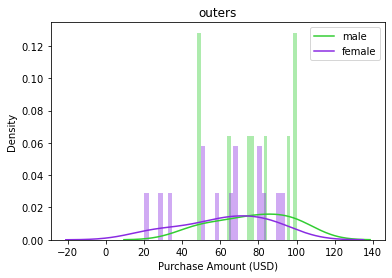

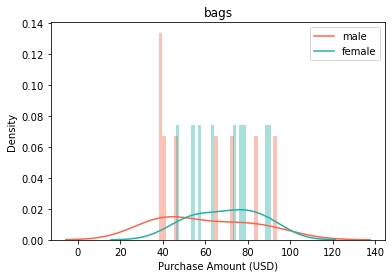

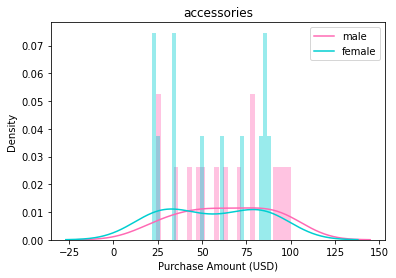

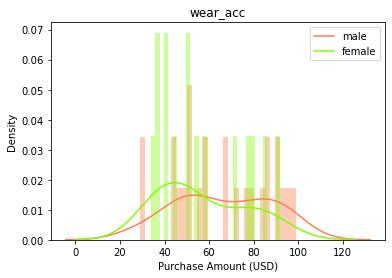

Gender  Item Purchased_new
Female  accessories            666
        bags                   629
        bottoms                778
        outers                 871
        shoes                  568
        tops                  1448
        wear_acc               854
Male    accessories            954
        bags                   480
        bottoms               1739
        outers                 690
        shoes                 1636
        tops                  1729
        wear_acc              1654
Name: Purchase Amount (USD), dtype: int64

In [239]:
item_color_dict = {'tops' : '#89CFF0', 
                   'bottoms' : '#FF69B4', 
                   'shoes' : '#FFD700', 
                   'outers' : '#7B68EE', 
                   'bags' : '#FF4500', 
                   'accessories' : '#9370DB',
                   'wear_acc' : '#32CD32'
}
color_index=0
for item in df['Item Purchased_new'].unique():
    for group in [male, female]:
        sns.distplot(
            df[New][group][df['Item Purchased_new']==item]['Purchase Amount (USD)'],
            color = colors[color_index], bins=30)
        plt.title(item)
        plt.legend(['male', 'female'])
        color_index +=1
    plt.show()
df[New].groupby(['Gender','Item Purchased_new']).sum()['Purchase Amount (USD)']


# 2. 집단별 계절 - item

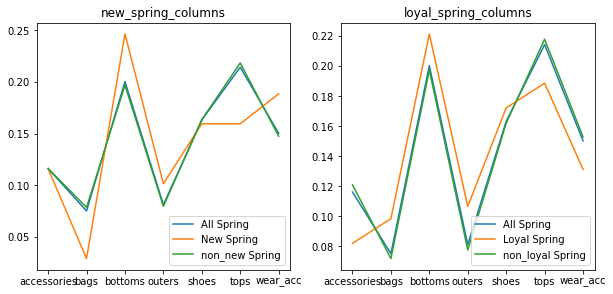

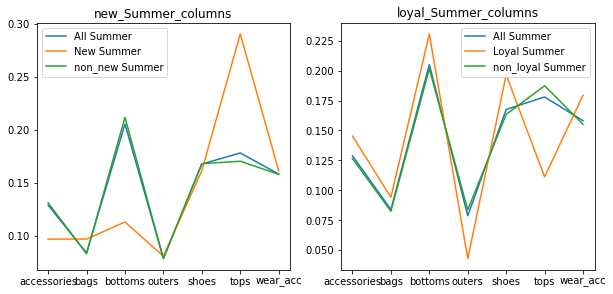

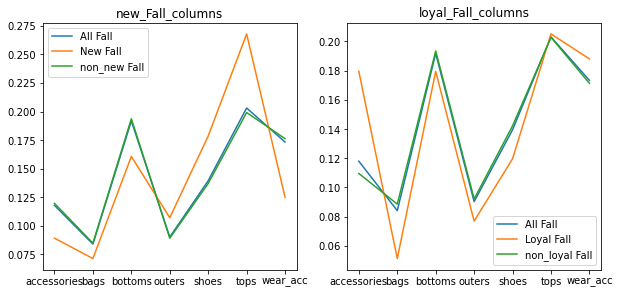

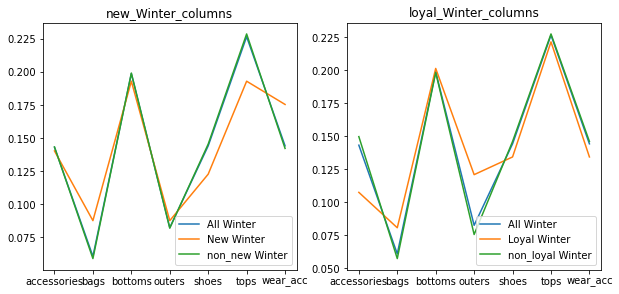

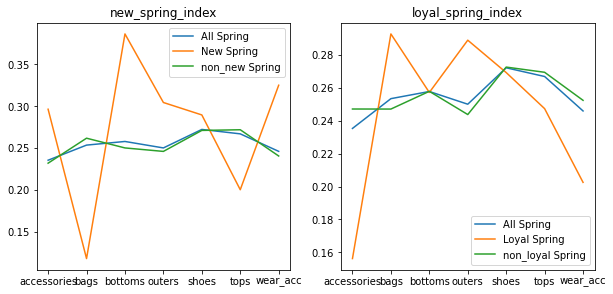

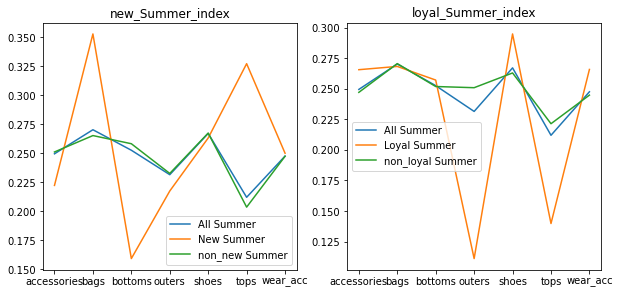

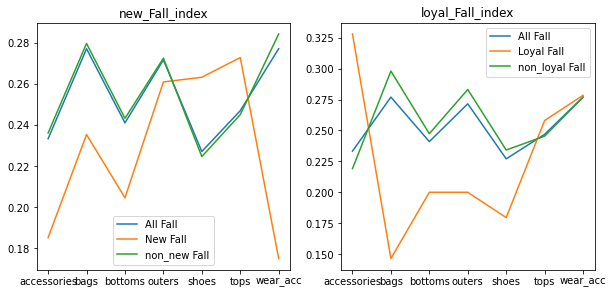

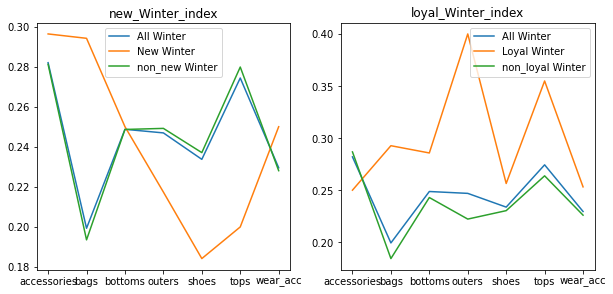

In [179]:
# customer type 조건
New = df['Customer Type'] == 'New Customer'
Loyal = df['Customer Type'] == 'Loyal Customer'

# season 조건
Spring = df['Season']=='Spring'
Summer = df['Season']=='Summer'
Fall = df['Season']=='Fall'
Winter = df['Season']=='Winter'

item_season = pd.crosstab(df['Item Purchased_new'], df['Season'], normalize = 'columns');
item_season_new = pd.crosstab(df[New]['Item Purchased_new'], df['Season'], normalize = 'columns');
item_season_Loyal = pd.crosstab(df[Loyal]['Item Purchased_new'], df['Season'], normalize = 'columns');
item_season_non_new = pd.crosstab(df[Non_New]['Item Purchased_new'], df['Season'], normalize = 'columns');
item_season_non_Loyal = pd.crosstab(df[Non_Loyal]['Item Purchased_new'], df['Season'], normalize = 'columns');
# 봄 - 신규
index = item_season.index
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season.Spring,label = 'All Spring')
plt.plot(index, item_season_new.Spring, label = 'New Spring')
plt.plot(index, item_season_non_new.Spring, label = 'non_new Spring')
plt.legend()
plt.title('new_spring_columns')

# 봄-충성
plt.subplot(2,2,2)
plt.plot(index, item_season.Spring,label = 'All Spring')
plt.plot(index, item_season_Loyal.Spring, label = 'Loyal Spring')
plt.plot(index, item_season_non_Loyal.Spring, label = 'non_loyal Spring')
plt.legend()
plt.title('loyal_spring_columns')
plt.show()
# 여름-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season.Summer,label = 'All Summer')
plt.plot(index, item_season_new.Summer, label = 'New Summer')
plt.plot(index, item_season_non_new.Summer, label = 'non_new Summer')
plt.legend()
plt.title('new_Summer_columns')

# 여름-충성
plt.subplot(2,2,2)
plt.plot(index, item_season.Summer,label = 'All Summer')
plt.plot(index, item_season_Loyal.Summer, label = 'Loyal Summer')
plt.plot(index, item_season_non_Loyal.Summer, label = 'non_loyal Summer')
plt.legend()
plt.title('loyal_Summer_columns')
plt.show()

# 가을-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season.Fall,label = 'All Fall')
plt.plot(index, item_season_new.Fall, label = 'New Fall')
plt.plot(index, item_season_non_new.Fall, label = 'non_new Fall')
plt.legend()
plt.title('new_Fall_columns')

# 가을-충성
plt.subplot(2,2,2)
plt.plot(index, item_season.Fall,label = 'All Fall')
plt.plot(index, item_season_Loyal.Fall, label = 'Loyal Fall')
plt.plot(index, item_season_non_Loyal.Fall, label = 'non_loyal Fall')
plt.legend()
plt.title('loyal_Fall_columns')
plt.show()

# 겨울-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season.Winter,label = 'All Winter')
plt.plot(index, item_season_new.Winter, label = 'New Winter')
plt.plot(index, item_season_non_new.Winter, label = 'non_new Winter')
plt.legend()
plt.title('new_Winter_columns')

# 겨울-충성
plt.subplot(2,2,2)
plt.plot(index, item_season.Winter,label = 'All Winter')
plt.plot(index, item_season_Loyal.Winter, label = 'Loyal Winter')
plt.plot(index, item_season_non_Loyal.Winter, label = 'non_loyal Winter')
plt.legend()
plt.title('loyal_Winter_columns')
plt.show()



# item 별 
item_season1 = pd.crosstab(df['Item Purchased_new'], df['Season'], normalize = 'index');item_gender1
item_season_new1 = pd.crosstab(df[New]['Item Purchased_new'], df['Season'], normalize = 'index');item_gender_new1
item_season_Loyal1 = pd.crosstab(df[Loyal]['Item Purchased_new'], df['Season'], normalize = 'index');item_gender_Loyal1
item_season_non_new1 = pd.crosstab(df[Non_New]['Item Purchased_new'], df['Season'], normalize = 'index');
item_season_non_Loyal1 = pd.crosstab(df[Non_Loyal]['Item Purchased_new'], df['Season'], normalize = 'index');

# 봄 - 신규
index = item_season.index
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season1.Spring,label = 'All Spring')
plt.plot(index, item_season_new1.Spring, label = 'New Spring')
plt.plot(index, item_season_non_new1.Spring, label = 'non_new Spring')
plt.legend()
plt.title('new_spring_index')

# 봄-충성
plt.subplot(2,2,2)
plt.plot(index, item_season1.Spring,label = 'All Spring')
plt.plot(index, item_season_Loyal1.Spring, label = 'Loyal Spring')
plt.plot(index, item_season_non_Loyal1.Spring, label = 'non_loyal Spring')
plt.legend()
plt.title('loyal_spring_index')
plt.show()
# 여름-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season1.Summer,label = 'All Summer')
plt.plot(index, item_season_new1.Summer, label = 'New Summer')
plt.plot(index, item_season_non_new1.Summer, label = 'non_new Summer')
plt.legend()
plt.title('new_Summer_index')

# 여름-충성
plt.subplot(2,2,2)
plt.plot(index, item_season1.Summer,label = 'All Summer')
plt.plot(index, item_season_Loyal1.Summer, label = 'Loyal Summer')
plt.plot(index, item_season_non_Loyal1.Summer, label = 'non_loyal Summer')
plt.legend()
plt.title('loyal_Summer_index')
plt.show()

# 가을-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season1.Fall,label = 'All Fall')
plt.plot(index, item_season_new1.Fall, label = 'New Fall')
plt.plot(index, item_season_non_new1.Fall, label = 'non_new Fall')
plt.legend()
plt.title('new_Fall_index')

# 가을-충성
plt.subplot(2,2,2)
plt.plot(index, item_season1.Fall,label = 'All Fall')
plt.plot(index, item_season_Loyal1.Fall, label = 'Loyal Fall')
plt.plot(index, item_season_non_Loyal1.Fall, label = 'non_loyal Fall')
plt.legend()
plt.title('loyal_Fall_index')
plt.show()

# 겨울-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season1.Winter,label = 'All Winter')
plt.plot(index, item_season_new1.Winter, label = 'New Winter')
plt.plot(index, item_season_non_new1.Winter, label = 'non_new Winter')
plt.legend()
plt.title('new_Winter_index')

# 겨울-충성
plt.subplot(2,2,2)
plt.plot(index, item_season1.Winter,label = 'All Winter')
plt.plot(index, item_season_Loyal1.Winter, label = 'Loyal Winter')
plt.plot(index, item_season_non_Loyal1.Winter, label = 'non_loyal Winter')
plt.legend()
plt.title('loyal_Winter_index')
plt.show()

In [211]:
# 검정15. 여성회원에 한해 신규집단 여부에 따라 상품구매 수가 같다.
summer_new_item1 = pd.crosstab(df[Summer]['Item Purchased_new'],df['binary_new'])
chi2, p, dof, ef = chi2_contingency(summer_new_item1)
print('여름에 신규집단 여부에 따라 상품구매 비가 다른가? : ', chi2, p, dof)

# 검정 16
bottoms = summer_new_item1.iloc[2]
tops = summer_new_item1.iloc[5]
other = summer_new_item1.iloc[[0,1,3,4,6]].sum()
tmp2 = pd.DataFrame({'bottoms' : bottoms, 'tops' : tops, 'other':other})
chi2, p, dof, ef = chi2_contingency(tmp2)
print('여름에 신규집단 내에서  bottoms, tops, other일 때 상품구매비가 다른가? : ', chi2, p, dof)
tmp2



# 검정17. 여성회원에 한해 신규집단 여부에 따라 상품구매 수가 같다.
summer_new_item2 = pd.crosstab(df[New]['Item Purchased_new'],df['Season'])
chi2, p, dof, ef = chi2_contingency(summer_new_item2)
print('신규집단 내에서 계절에 따라 상품구매비가 다른가? : ', chi2, p, dof)
summer_new_item2

bags = summer_new_item2.iloc[1]
bottoms = summer_new_item2.iloc[2]
tops = summer_new_item2.iloc[5]
shoes = summer_new_item2.iloc[4]
wear_acc = summer_new_item2.iloc[6]
other = summer_new_item2.iloc[[0,3]].sum()
tmp3 = pd.DataFrame({'bags' : bags, 'bottoms' : bottoms, 'tops' : tops,'shoes':shoes, 'wear_acc':wear_acc,'other':other})
chi2, p, dof, ef = chi2_contingency(tmp3)
print('신규집단 내에서 계절이 6개범주 상품 구매비에 영향을 끼치는가? : ', chi2, p, dof)
tmp2

여름에 신규집단 여부에 따라 상품구매 비가 다른가? :  8.137810639040904 0.22817985375457928 6
여름에 신규집단 내에서  bottoms, tops, other일 때 상품구매비가 다른가? :  7.495550435032298 0.023570125970624665 2
신규집단 내에서 계절에 따라 상품구매비가 다른가? :  11.686022773264817 0.863016541948926 18
여름에 신규집단 내에서  bottoms, tops, other일 때 상품구매비가 다른가? :  11.041039886448411 0.7496797299326576 15


,bottoms,tops,other
binary_new,,,
New,7,18,37
Others,189,152,552


### 매출분포확인

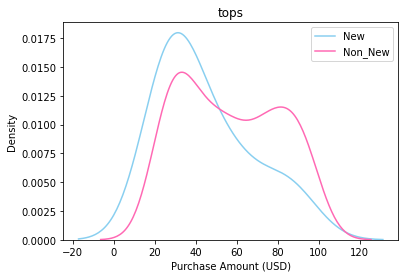

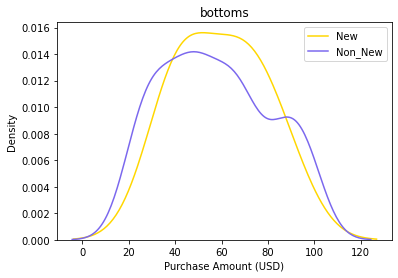

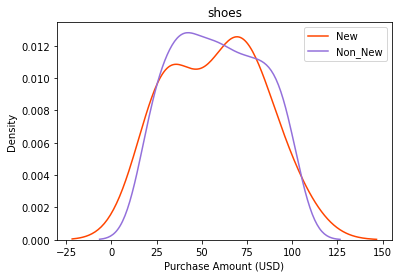

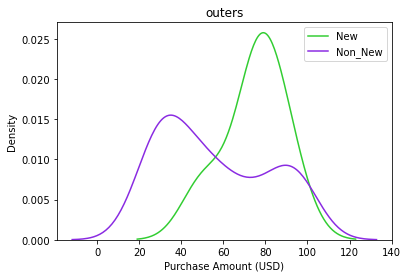

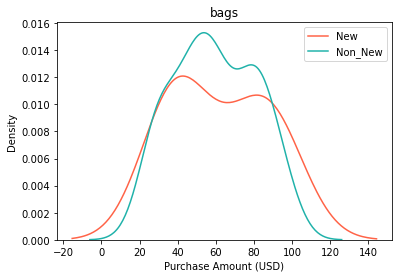

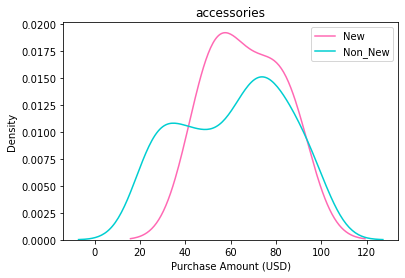

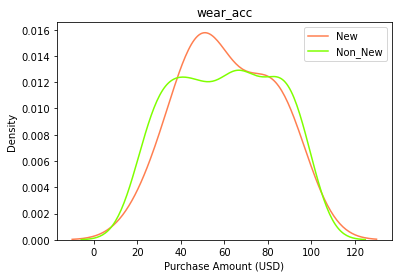

binary_new  Item Purchased_new
New         accessories           66.500000
            bags                  61.833333
            bottoms               59.571429
            outers                74.600000
            shoes                 57.500000
            tops                  44.444444
            wear_acc              61.300000
Others      accessories           60.974359
            bags                  59.445946
            bottoms               57.492063
            outers                55.785714
            shoes                 58.786667
            tops                  56.526316
            wear_acc              60.390071
Name: Purchase Amount (USD), dtype: float64

In [214]:
# 신규집단 여성 columns 그래프에서 차이가 어느정도 보였기에 매출 분포 확인.
item_color_dict = {'tops' : '#89CFF0', 
                   'bottoms' : '#FF69B4', 
                   'shoes' : '#FFD700', 
                   'outers' : '#7B68EE', 
                   'bags' : '#FF4500', 
                   'accessories' : '#9370DB',
                   'wear_acc' : '#32CD32'
}
color_index=0
for item in df['Item Purchased_new'].unique():
    for group in [New,Non_New]:
        sns.kdeplot(
            df[Summer][group][df['Item Purchased_new']==item]['Purchase Amount (USD)'],
            color = colors[color_index])
        plt.title(item)
        plt.legend(['New','Non_New'])
        color_index +=1
    plt.show()
df[Summer].groupby(['binary_new','Item Purchased_new']).mean()['Purchase Amount (USD)']

Text(0.5, 1.0, 'new_Winter_columns')

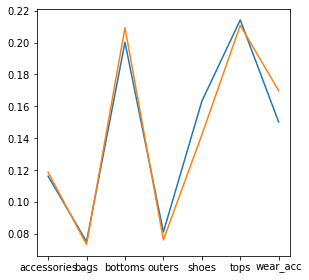

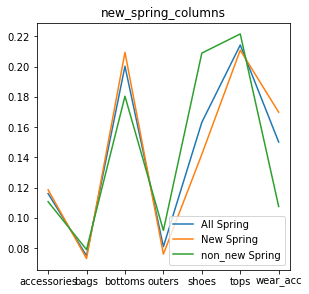

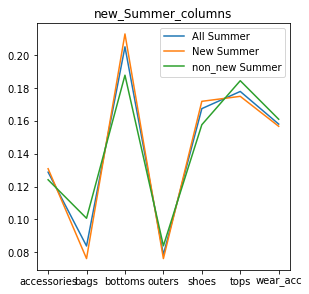

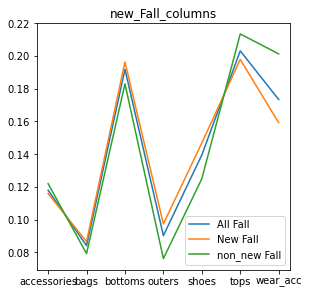

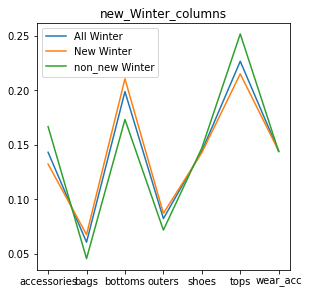

In [241]:
# customer type 조건
New = df['Customer Type'] == 'New Customer'
Loyal = df['Customer Type'] == 'Loyal Customer'

# season 조건
Spring = df['Season']=='Spring'
Summer = df['Season']=='Summer'
Fall = df['Season']=='Fall'
Winter = df['Season']=='Winter'

item_season = pd.crosstab(df['Item Purchased_new'], df['Season'], normalize = 'columns');
item_season_new = pd.crosstab(df[male]['Item Purchased_new'], df['Season'], normalize = 'columns');
item_season_Loyal = pd.crosstab(df[female]['Item Purchased_new'], df['Season'], normalize = 'columns');

# 봄 - 신규
index = item_season.index
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season.Spring,label = 'All Spring')
plt.plot(index, item_season_new.Spring, label = 'New Spring')
# customer type 조건
New = df['Customer Type'] == 'New Customer'
Loyal = df['Customer Type'] == 'Loyal Customer'

# season 조건
Spring = df['Season']=='Spring'
Summer = df['Season']=='Summer'
Fall = df['Season']=='Fall'
Winter = df['Season']=='Winter'

item_season = pd.crosstab(df['Item Purchased_new'], df['Season'], normalize = 'columns');
item_season_new = pd.crosstab(df[male]['Item Purchased_new'], df['Season'], normalize = 'columns');
item_season_Loyal = pd.crosstab(df[female]['Item Purchased_new'], df['Season'], normalize = 'columns');

# 봄 - 신규
index = item_season.index
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season.Spring,label = 'All Spring')
plt.plot(index, item_season_new.Spring, label = 'New Spring')
plt.plot(index, item_season_Loyal.Spring, label = 'non_new Spring')
plt.legend()
plt.title('new_spring_columns')

# 여름-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season.Summer,label = 'All Summer')
plt.plot(index, item_season_new.Summer, label = 'New Summer')
plt.plot(index, item_season_Loyal.Summer, label = 'non_new Summer')
plt.legend()
plt.title('new_Summer_columns')


# 가을-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season.Fall,label = 'All Fall')
plt.plot(index, item_season_new.Fall, label = 'New Fall')
plt.plot(index, item_season_Loyal.Fall, label = 'non_new Fall')
plt.legend()
plt.title('new_Fall_columns')


# 겨울-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season.Winter,label = 'All Winter')
plt.plot(index, item_season_new.Winter, label = 'New Winter')
plt.plot(index, item_season_Loyal.Winter, label = 'non_new Winter')
plt.legend()
plt.title('new_Winter_columns')



Text(0.5, 1.0, 'new_Winter_index')

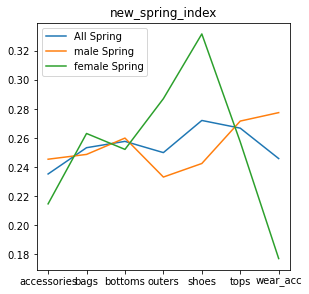

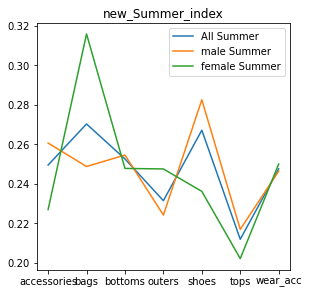

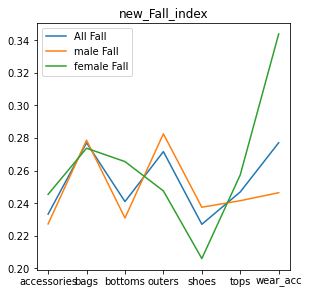

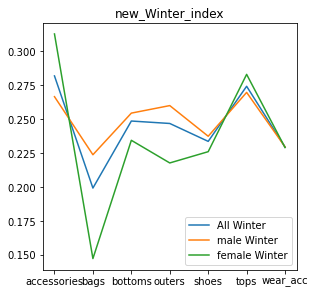

In [243]:


# item 별 
item_season1 = pd.crosstab(df['Item Purchased_new'], df['Season'], normalize = 'index');item_gender1
item_season_new1 = pd.crosstab(df[male]['Item Purchased_new'], df['Season'], normalize = 'index');item_gender_new1
item_season_Loyal1 = pd.crosstab(df[female]['Item Purchased_new'], df['Season'], normalize = 'index');item_gender_Loyal1
item_season_non_new1 = pd.crosstab(df[Non_New]['Item Purchased_new'], df['Season'], normalize = 'index');
item_season_non_Loyal1 = pd.crosstab(df[Non_Loyal]['Item Purchased_new'], df['Season'], normalize = 'index');

# 봄 - 신규
index = item_season.index
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season1.Spring,label = 'All Spring')
plt.plot(index, item_season_new1.Spring, label = 'male Spring')
plt.plot(index, item_season_Loyal1.Spring, label = 'female Spring')
plt.legend()
plt.title('new_spring_index')

# 여름-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season1.Summer,label = 'All Summer')
plt.plot(index, item_season_new1.Summer, label = 'male Summer')
plt.plot(index, item_season_Loyal1.Summer, label = 'female Summer')
plt.legend()
plt.title('new_Summer_index')


# 가을-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season1.Fall,label = 'All Fall')
plt.plot(index, item_season_new1.Fall, label = 'male Fall')
plt.plot(index, item_season_Loyal1.Fall, label = 'female Fall')
plt.legend()
plt.title('new_Fall_index')


# 겨울-신규
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.plot(index, item_season1.Winter,label = 'All Winter')
plt.plot(index, item_season_new1.Winter, label = 'male Winter')
plt.plot(index, item_season_Loyal1.Winter, label = 'female Winter')
plt.legend()
plt.title('new_Winter_index')
